# Stock market clustering

_Data Structures and Algorithms_

_Imperial College Business School_


---
This assignment is divided into three parts. In the first part, you will work on `pandas` data analysis. In the second part, you will implement a clustering algorithm to group companies based on their stock price movements. In the final part, you will explore ways to extend and improve this analysis. 

---

**The assignment is graded not only on correctness but also on the presentation of the results.** Try to make the results of your calculations easy to read with eg string formatting, do some plots if you find them useful, and comment your code.

**There are no OK tests to test your functions in this assignment.** It is intended to set you up working on a real problem where you have to explore data and the problem to figure out your approach. The first part will also require you to use a search engine to find the right pandas functions to use to analyse your data. Some potentially useful pandas functions are listed in the file `veryUseful.py`. 

**You're working as a group, so you may wish to divide the work into smaller pieces.** Some of you may want to start working on the Pandas part, and others on the algorithm part. There is a set of intermediary results available for testing your algorithm, so you can start immediately on both parts. See the details below in question 3.


## Your group

You'll complete this assignment in your assigned study groups. If you are unsure about your group, please contact the programme team.

## Submission

Create a zip file containing your submission notebook (and possible other files required to run your code). Submit by uploading the zip file on the Hub: Go to DSA -> Assessment -> Homework 3. Only one submission is needed for your group. **Please note that the Hub has a file size limit.**

## Part 1: Pandas

**30% of grade**

In the previous homework, we used lists to study stock prices. The `pandas` library provides some more effective tools for data analysis.

The assignment comes with two files containing company data:
- `SP_500_firms.csv` with firm and ticker names
- `SP_500_close_2015.csv` with stock price data for 2015

Let's first load up this data.

In [ ]:
import os
os.chdir("/content/drive/My Drive/Grp21_HW03")
# We need to take this down when submit

FileNotFoundError: ignored

In [1]:
# Load data into Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

def read_names_into_dict():
    """
    Read company names into a dictionary
    """
    d = dict()
    with open("SP_500_firms.csv") as csvfile:
        input_file = csv.DictReader(csvfile)
        for row in input_file:
            #print(row)
            d[row['Symbol']] = [row['Name'],row['Sector']]
    return d

names_dict = read_names_into_dict()
comp_names = names_dict.keys()

# Read price data with pandas
filename = 'SP_500_close_2015.csv'
price_data = pd.read_csv(filename, index_col=0)

styles = [dict(selector="caption", props=[("text-align", "left"), ("font-size", "150%")])]

### Question 1: Returns

In the previous homework, we calculated stock price _returns_ over a period of time. The return is defined as the percentage change, so the return between periods $t-1$ and $t$ for stock price $p$ would be

$$
x_t = \frac{p_t - p_{t-1}}{p_{t-1}}.
$$

Calculate the returns in `pandas` for all the stocks in `price_data`.

In [2]:
display(price_data.head(5))

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,156.678596,43.160459,61.986410,86.129228,19.765196,139.234407,72.339996,158.132353,12.860543,87.354435,...,33.927597,13.191375,41.513829,32.998169,37.072501,50.169998,69.542301,110.963875,27.853656,42.723658
2015-01-05,153.145069,43.170070,60.819874,84.674997,19.490271,135.889914,71.980003,156.047994,12.494440,86.173965,...,33.542483,12.903563,40.752108,33.199318,34.765202,49.130001,68.129346,115.103219,26.810004,42.467175
2015-01-06,151.511999,42.679830,60.518833,84.064223,19.126976,134.187800,70.529999,155.938290,12.212822,86.301853,...,33.720953,12.730876,40.161775,33.362155,34.560759,49.209999,67.293113,114.127520,25.786046,42.052863
2015-01-07,152.610267,43.025880,62.964797,85.828689,18.714587,136.566769,71.110001,159.289228,12.231597,88.033197,...,34.012134,12.893969,40.180818,33.381309,34.833350,48.590000,69.523080,116.965922,26.032190,42.920947
2015-01-08,156.267949,43.910238,63.623323,87.137495,18.901144,141.344618,72.919998,160.685446,12.419342,90.885990,...,34.406643,13.248937,41.075840,33.927287,35.096207,50.230000,70.734178,118.207726,26.396482,43.581878


In [3]:
# Calculate company returns in this cell
#.pct_change just automatically calculates percentage returns between subsequent rows
returns = price_data.pct_change()
returns.head(10).style.set_caption('Daily percentage returns S&P500').set_table_styles(styles)

### Question 1.1: Highest and lowest daily returns

Use pandas to find the 10 highest daily returns amongst all companies. Search online for what were the reasons behind the highest returns. Present your results in a clean and immediately readable form.

Repeat with the lowest daily returns.

In [4]:
# Your code here

def n_largest_lowest(returns, large_or_small):
    '''
    function takes in a dataframe and a string and returns the 10 largest or
    smallest values in the entire dataframe as a dictionary in the format:
    {'Ticker': (Date, Highest/lowest return)}
    '''
    h = []
    #this returns either the largest or smallest value from each column
    for col in returns.columns:
        values = []
        if large_or_small == 'largest':
            values = returns[col].nlargest(1)
        elif large_or_small == 'lowest':
            values = returns[col].nsmallest(1)
        #the value is appended to a list
        h.append(pd.DataFrame({col: values}).reset_index(drop=True))
    
    #here we find the 10 largest or smallest values in the list of
    #largest or smallest values for each column
    largest_lowest = pd.concat(h,axis=1)
    if large_or_small == 'largest':
        l = largest_lowest.T.nlargest(10,columns=[0]).T
    elif large_or_small == 'lowest':
        l = largest_lowest.T.nsmallest(10,columns=[0]).T

    d = {}
    #put the 10 largest or smallest returns in a dictionary with the ticker name and date at which it occurred
    for col in l:
        d[col] = (returns[returns[col] == l.at[0,col]].index[0], l.at[0,col])
    
    low_high = pd.DataFrame.from_dict(d)
    low_high.index = ['Date','Return']
    
    return low_high

In [5]:
lowest_returns = n_largest_lowest(returns,'lowest')
lowest_display = lowest_returns.style.set_caption('10 lowest daily returns').set_table_styles(styles)
display(lowest_display)

,PWR,KORS,BIIB,SRCL,YUM,RL,MU,NRG,MNK,AKAM
Date,2015-10-16,2015-05-27,2015-07-24,2015-10-23,2015-10-07,2015-02-04,2015-06-26,2015-12-04,2015-11-09,2015-10-28
Return,-0.285006,-0.241954,-0.220802,-0.192767,-0.188324,-0.182169,-0.181515,-0.179581,-0.169981,-0.167306


#### 16/10/2015, Quanta Services Inc.

The energy contractor's shares dropped by over 28% as a result of management warning the public that third-quarter were expected to be weaker than previously thought. Investors were especially dissapointed due to the news that earnings were expected to drop from \\$0.34 to \\$0.40 per share down to \\$0.22 to \\$0.24 per share. This news came as a result of project delays and aggressive bidding by competitors on smaller projects, combined with no new large projects to fill the gap.

#### 27/05/2015, Capri Holdings, Limited

Capri Holdings' shares dropped by 24% as a result of continuous declining same-store sales for four consecutive quarters, while Wall Street analysts had actually forecast growing numbers of sales. The forward earnings outlook was also weaker than what investors expected, with the company expecting a next year revenue in the range of \\$4.7-\\$4.8 billion and earnings per share to land between \\$4.40 and \\$4.50 while Wall Street looked for values in the range of \\$5.05 billion in revenue and \\$4.70 per share.

#### 24/07/2015, Biogen Inc.

Biogen stock price dropped by over 20% as a result of weaker-than-expected revenues from sales of their top-selling drug for treating multiple sclerosis. Analysts also believed that Biogen customers were being siphoned by competing firms such as Novartis AG, which offers their own multiple sclerosis drug. Additionally, sales for Biogen's other multiple sclerosis drugs decreased as well, in part most likely due to a reported death of a patient taking a Biogen drug. All these factors contributed to lower earnings than expected and decreased investor confidence.

#### 23/10/2015, Stericycle Inc.

The waste disposal company Stericycle experienced a decrease in share price of over 19% as a result of weak revenue growth and lack of earnings growth. CEO Charlie Alutto blamed these on the strengthening of the US dollar, decrease in hazardous-waste volumes to dispose and higher-than-anticipated expenses in some areas.

#### 07/10/2015, Yum! Brands Inc.

Fast-food company Yum! Brands's stock decreased in price by over 18% after disappointing third-quarter results and reduced full-year earning expectations. These come as a result of a slower recovery in China than was previously expected and mismanagement and execution of promotions in the country, such as the inclusion of premium foods at premium prices in chains such as Pizza Hut, as opposed to the regular cheaper meals.

#### 04/02/2015, Ralph Lauren

American fashion company Ralph Lauren reported its lowest closing level in its history at the time with a closing price that was down 18.22%. This came as a result of a very disappointing third-quarter report and outlook and came to a surprise to many as it had beat expectations for the previous 14 months.

#### 26/06/2015, Micron Technology, Inc.

The semiconductor company's stock dropped 18.2% after a weak third-quarter earnings report and future outlook. Due to weaknesses in the PC sector, revenues came in at \\$3.85 billion, just short from the forecasted \\$3.9 billion and earnings per share at \\$0.43 as opposed to the expected \\$0.57. Additionally, next quarter revenues are expected to be up to \\$0.7 billion lower than analyst estimates. 

#### 04/12/2015, NRG Energy Inc.

The energy producer and retailer's stock dropped by 18% after its President and CEO David Crane stepped down from his role, after a series of shifts in the company's organisation and strategy moving forward failed to convince investors during a turbulent period of energy firms. The combination of low oil and gas prices and high interest rates at the time put investors off of renewables, just when NRG was looking to shift towards decreasing its carbon footprint and increasing green energy production.

#### 09/11/2015, Mallinckrodt Pharmaceuticals

The pharmaceutical company's share price dropped by 17% as a result of criticism from the stock commentary site Citron Research, which wrote in a Tweet that Mallinckrodt 'has far more downsides' than its competitor Valeant Pharmaceuticals, and accused the company of taking advantage of the insurance reimbursement system. Mallinckrodt has been known to purchase right to produce older drugs and subsequently increasing its prices, leading to some large hospitals having heavily increased expenses.

#### 28/10/2015, Akamai Technologies

Despite a higher-than-expected third-quarter earnings report, Akamai experienced an overall decrease of 16.7% in its stock price after its earnings call, in which management said it expected fourth-quarter earnings to be well below expectations. The company expected to record earnings of \\$567 million and earnings per share of \\$0.62 as opposed to Wall Street analyst forecasts of \\$597 in revenues and \\$0.65 earnings per share.

In [6]:
largest_returns = n_largest_lowest(returns,'largest')
largest_display = largest_returns.style.set_caption('10 largest daily returns').set_table_styles(styles)
display(largest_display)

,FCX,WMB,TRIP,HAR,QRVO,WYNN,HUM,KLAC,PRGO,NFLX
Date,2015-08-27,2015-06-22,2015-10-14,2015-01-29,2015-11-06,2015-10-02,2015-05-29,2015-10-21,2015-04-08,2015-04-16
Return,0.286616,0.258999,0.255361,0.237600,0.232254,0.228389,0.203128,0.187895,0.183899,0.182118


#### 27/08/2015, Freeport-McMoran Inc.

The mining company's share prices grew by over 28% after the announcement that activist investor Carl Icahn had become the largest shareholder in the company, subsequent to the purchase of 88 million shares. Icahn, then having an 8.5% stake, announced his plans to discuss cuts in the company's operations and spending. The company had also already planned cuts to some of its activities in light of slower growth in China, which increased stock prices further.

#### 22/06/2015, The Williams Companies Inc.

The Williams Companies stock soared by nearly 26% after the announcement of its rejection to be bought out by Dallasbased Energy Transfer Equity. The prospect of the Williams Companies and ETE merger led to the massive increase in the former's share price.

#### 14/10/2015, TripAdvisor

TripAdvisor, the vacation-planning website, announced a deal with the online travel agency Priceline, which would allow users to book accomodations from Priceline's catalog of hotels. This led to an increase in 25.5% of TripAdvisors stock price as this would bring the company ever closer to becoming the world's largest online travel-booking site.

#### 29/01/2015, Harman International Industries

The car infotainment company experienced a stock growth of 23.7% as a result on increased sales of autos. As a result, Harman customers, which include automobile producers such as Volkswagen, BMW and Toyota, increased their demand of in-car entertainmant software. The company had also announced a networking service for its products in China, as well as the purchase of two software firms. All in all, the company beat expected revenues and earnings per share of \\$1.48 and \\$1.28 as they reported \\$1.58 billion in revenue and earned \\$1.79 per share.

#### 06/11/2015, Qorvo

The tech company reported a near-double increase in its revenues during the second quarter compared to the previous year. It also beat expected earnings on shares and announced a new \\$1 billion share repurchase program after completing a similar program worth \\$400 million. Overall, the company's share price increased by just over 23%.

#### 02/10/2015, Wynn Resorts, Limited

Wynn Resorts' stock increased by nearly 23% after Chinese government officials announced that they would be looking to support the gambling business in Macau, where the company has half of its establishments. 

#### 29/05/2015,  Humana Inc.

The health insurance company increased its share value by over 20% after it was announced they had hired Goldman Sachs to aid in valuing the company as it was looking to sell itself. 

#### 21/10/2015, KLA Corporation

News that Lam Research Corp. intended to purchase KLA in a cash-and-stock deal valued \\$10.6 billion led to the increase of KLA-Tencor share price by 18.7%. The deal sought to create a "premier" semiconductor provider and valued KLA at \\$67.02 per share, well above what the market closed at the previous day.

#### 08/04/2015, Perrigo

The English pharmaceutical company is the target of a proposed acquisition by Mylan valued at \\$29 billion. Mylan offered \\$205 per share, marking a 25% increase compared to what Perrigo stock was previously traded at. This led to Perrigo stock increasing in value by 18.3%. 

#### 16/04/2015, Netflix

Despite missing expected first-quarter earnings by a significant margin, Netflix stock rose by 18.2%, investors seemed to value the much higher subscription increase than was previously forecast. This appears to encourage investors to seek returns later as the platform continues to grow.

### Question 1.2: Highest and lowest yearly returns

Find the 10 highest yearly returns amongst all companies. Present your results in a clean and immediately readable form.

Repeat with the lowest yearly returns.

In [7]:
# Your code here
m = []
#find the difference between the price of stock at the beginning of the year and price at the end of the year
#obtain return
for col in price_data:
    a = (price_data[col].iloc[-1] - price_data[col].iloc[0])/price_data[col].iloc[0]
    m.append(pd.DataFrame({col: a}, index=[0]).reset_index(drop=True))
    
    
df = pd.concat(m,axis=1)
df.index = ['Return']
#find 10 largest and smallest yearly returns among all tickers
largest_yearly = df.T.nlargest(10,columns=['Return']).T
largest_yearly_display = largest_yearly.style.set_caption('10 largest yearly returns').set_table_styles(styles)

lowest_yearly = df.T.nsmallest(10,columns=['Return']).T
lowest_yearly_display = lowest_yearly.style.set_caption('10 lowest yearly returns').set_table_styles(styles)

display(largest_yearly_display)
display(lowest_yearly_display)

,NFLX,AMZN,ATVI,AYI,NVDA,GPN,HRL,EXR,VRSN,RAI
Return,1.294549,1.190750,0.942684,0.676443,0.664514,0.600933,0.559016,0.544469,0.527540,0.497837


,CHK,SWN,FCX,KMI,MU,NRG,RRC,MRO,MUR,WYNN
Return,-0.769785,-0.738314,-0.703792,-0.632032,-0.592518,-0.559234,-0.553864,-0.546383,-0.538541,-0.516602


### Question 1.3: Highest and lowest volatilities

Find the 10 highest yearly volatilities (standard deviations) amongst all companies. Present your results in a clean and immediately readable form.

Repeat with the lowest volatilities.

In [8]:
# Your code here
vols = []
#loop finds the volatilities of each company
for col in returns:
    vols.append(pd.DataFrame({col: returns[col].std()}, index=[0]).reset_index(drop=True))

vf = pd.concat(vols,axis=1)
vf.index = ['Volatility']
#here find the 10 largest and smallest volatilities out of all companies
largest_vols = vf.T.nlargest(10,columns=['Volatility']).T
largest_vols_display = largest_vols.style.set_caption('10 companies with largest volatilities').set_table_styles(styles)

lowest_vols = vf.T.nsmallest(10,columns=['Volatility']).T
lowest_vols_display = lowest_vols.style.set_caption('10 companies with lowest volatilities').set_table_styles(styles)

display(largest_vols_display)
display(lowest_vols_display)

,FCX,CHK,RIG,SWN,WYNN,QRVO,MNK,WMB,RRC,NFLX
Volatility,0.044071,0.042784,0.037553,0.035199,0.034918,0.033473,0.032573,0.032224,0.032172,0.031975


,KO,CHD,AJG,PEP,CLX,DVA,T,VZ,RSG,PG
Volatility,0.009063,0.009599,0.009711,0.009713,0.009725,0.009882,0.009943,0.009949,0.009973,0.010106


### Question 2: Correlations

Analysts often care about the _correlation_ of stock prices between firms. Correlation measures the statistical similarity between the two prices' movements. If the prices move very similarly, the correlation of their _returns_  is close to 1. If they tend to make exactly the opposite movements (ie one price moves up and the other one down), the correlation is close to -1. If there is no clear statistical relationship between the movements of two stock prices, the correlation in their returns is close to zero.

For a sample of stock price returns $x,y$ with observations for $n$ days, the correlation $r_{xy}$ between $x$ and $y$ can be calculated as:

$$
r_{xy} = \frac{\sum x_i y_i - n \bar{x}\bar{y}}{ns_x s_y} = {\frac {n\sum x_{i}y_{i}-\sum x_{i}\sum y_{i}}{{\sqrt {n\sum x_{i}^{2}-(\sum x_{i})^{2}}}~{\sqrt {n\sum y_{i}^{2}-(\sum y_{i})^{2}}}}}.
$$

Here $\bar{x}$ refers to the average value of $x$ over the $n$ observations, and $s_x$ to its standard deviation.

Based on time series of the stock returns we just computed, we can calculate a  correlation value for each pair of stocks, for example between MSFT (Microsoft) and AAPL (Apple). This gives us a measure of the similarity between the two stocks in this time period.


Calculate all correlations between companies. You can search online for a `pandas` or `numpy` function that does this directly.

In [9]:
# Your code here
# This code may take a while to run
corr_matrix = []
#calculate the correlation using .corr between each and every single company with nested loop
for col1 in returns:
    corrs = []
    for col2 in returns:
        #for same company, correlation would obviously be 1, so replace with None
        if col1 == col2:
            corrs.append(None)
        else:
            corrs.append(returns[col1].corr(returns[col2]))
    corr_matrix.append(pd.DataFrame({col1: corrs}).reset_index(drop=True))



In [10]:
cm = pd.concat(corr_matrix,axis=1)
cm.index = list(cm.head(0))
cm.head(10).style.set_caption('Correlation matrix for all S&P500 companies').set_table_styles(styles)

### Question 2.1

Next, analyse the correlations between the companies:
- Define functions to print out the $n$ top and bottom correlated companies for any given company. 
- Use your functions to study the following companies in the tech sector: Amazon, Microsoft, Facebook, Apple, and Google. Comment on the results. Which (possibly other) companies are they most closely related to in terms of highest correlations? Would you have expected the results you see?

In [11]:
from IPython.core.display import display, HTML

#function taken from stack overflow:
#https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
#answer by user Anton Golubev
def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

/var/folders/vk/6zc9f_0n2qn_zgtxtq1hsch80000gn/T/ipykernel_13276/2228008422.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [12]:
# Your code here
def ncorrs(stock_name,n,top_or_bottom):
    '''
    Function takes a ticker name, an integer n and a string 'top' or 'bottom'
    and returns a list of n highest or lowest correlated companies for the given ticker
    '''
    v = []
    if top_or_bottom == 'top':
        v = cm.nlargest(n,stock_name)
    elif top_or_bottom == 'bottom':
        v = cm.nsmallest(n,stock_name)
        
    return v[stock_name].to_frame()
    

### Top 10 correlations

In [13]:
amzn = ncorrs('AMZN',10,'top')
msft = ncorrs('MSFT',10,'top')
fb = ncorrs('FB',10,'top')
aapl = ncorrs('AAPL',10,'top')
goog = ncorrs('GOOG',10,'top')
display_side_by_side([amzn,msft,fb,aapl,goog],['Amazon','Microsoft','Facebook','Apple','Google'])

,AMZN
GOOGL,0.585553
GOOG,0.584337
SBUX,0.571951
V,0.560704
MA,0.538708
JNPR,0.531443
MSFT,0.524403
FB,0.500222
HSIC,0.479651
IPG,0.471228


From the first table above, the performance of Amazon seems to correlate well with other tech companies such as Google, Facebook and Microsoft, as well as financial services firms such as Visa and Mastercard. This would make sense as companies and firms working in the same industry would be subject to many similar factors specific to that industry and would probably generally be affected by changing conditions of the indutry in similar ways. The other companies Amazon is highly correlated to all had solid performances throughout 2015 so while not directly related to Amazon or working in the same industry they do still appear to match Amazon's performance trend for this specific year. Interestingly, 2015 is the year Juniper Networks (JNPR) began working closely with Amazon to migrate more of their operations and data to AWS cloud services while in 2017 Amazon hired Interpublic Group of Cos. (IPG) to handle their global media planning.

Microsoft's correlation table seems less consistent with the idea that companies in similar industries will move in similar manners. While it is highly correlated to other technology companies such as Fiserv (FISV), Accenture (ACN) and ADP, it seems to be overly correlated with companies producing consumer goods such as Starbucks (SBUX), Procter & Gamble (PG) or Carrefour (CA). The technology companies it does correlate with mostly produce software for specific applications such as human resources (ADP) or fintech (FISV). This could be a case of not having enough data to properly reach accurate correlations between companies, as one year does not cover a wide enough range to properly evaluate the long-term performances of companies in different industries.

Facebook seems to correlate quite well to many large tech companies like Google, Innotec (TSS) and Fiserv, as well as Mastercard and Visa. Like Amazon, Facebook also has an online marketspace which could justify both these companies' correlations to online banking services from Mastercard and Visa. Facebook seems to more closely correlate to firms within its industry as all the top 10 companies by correlation except for Starbucks are involved in some manner in the tech industry.

Apple appears to correlate highly with many engineering companies such as Boeing (BA) or Northrop Grumman (NOC). This can make sense when considering the fact that Apple has expanded into this industry, especially with their sound engineering and production of headphones. Apple's performance seems to also be linked to that of semiconductor producers such as Skyworks Solutions (SWKS) and TE Connectivity (TEL), as the most likely uses many of these for their core operations. There seems to be a noticeable link between Apple and Coles Supermarket, although this is most likely random.

Google is, out of the five stocks analysed, the one that is most correlated to the other four. It shows high correlation with Facebook, Microsoft, Amazon, as well as Mastercard and other technology companies like Fiserv. Unsurprisingly, GOOG stock is almost perfectly correlated to GOOGL, both being issued by Google, the first not carrying any voting rights, as opposed to GOOGL which does. Google is also correlated, probably randomly, to healthcare firm Henry Schein (HSIC), Starbucks and insurance firm Progressive Corp (PGR).

While interesting to look at, it does seem that there is an element of randomness in the correlations of these companies with all others in the S&P500 index. These tech companies that have been analysed seem to broadly correlate to similar or related companies, however, also present links to unrelated firms, such as Starbucks being highly correlated with all but Apple. This is most likely due to the timeframe that has been analysed not being long enough to see trends in same-industry firms over the long-term and more accurately determine how these corporations act with respect to one-another. Over one year, two completely unrelated firms could have similar performances due to completely different reasons and factors. While correlation is a useful tool to look at how share prices might move, it must be obtained with more data to provide a more robust and accurate value.

## Part 2:  Clustering

**30% of grade**

In this part of the assignment, you will develop a clustering algorithm to study the similarity of different stocks. 

The general purpose of clustering analysis is dividing a set of objects into groups that are somehow "similar" to each other. It is a widespread tool used for exploratory data analysis in diverse fields in both science and business. For example, in marketing analytics, cluster analysis is employed to group consumers into segments based on their characteristics or _features_, such as age, post code, purchase history, etc. These features are somehow aggregated to compare the similarity between consumers. Based on this similarity, a clustering algorithm then divides the consumers into segments.

We will apply this idea on stock market data to identify groups of stocks that perform similarly over time. There are many reasons for grouping stocks together, such as analysing trading strategies, risk management, or simply presenting stock market information. Publicly traded companies are often grouped together by simple features such as the industry they operate in (eg tech companies or pharma companies), but here we'll take a data-driven approach, grouping together stocks that perform similarly over time. 

Cluster analysis is an umbrella term for many different algorithmic approaches. Here you'll develop one that's based on the concept of `greedy` algorithm design, specified below. You'll also have the opportunity to explore other approaches using Python libraries.

What is a good measure for stocks "performing similarly" to use for clustering. Let's use the one we just calculated: correlations in their returns. How can we use this similarity information for clustering? We now have access to all correlations between stock returns in S&P 500. We can think of this as a _graph_ as follows. The _nodes_ of the graph are the stocks (eg MSFT and AAPL). The _edges_ between them are the correlations, which we have just calculated between each stock, where the value of the correlation is the edge weight. Notice that since we have the correlations between all companies, this is a _dense_ graph, where all possible edges exist.

We thus have a graph representing pairwise "similarity" scores in correlations, and we want to divide the graph into clusters. There are many possible ways to do this, but here we'll use a _greedy_ algorithm design. The algorithm is as follows:

1. Sort the edges in the graph by their weight (ie the correlation), pick a number $k$ for the number of iterations of the algorithm
2. Create single-node sets from each node in the graph
3. Repeat $k$ times:
	1. Pick the graph edge with the highest correlation
	2. Combine the two sets containing the source and the destination of the edge
	3. Repeat with the next-highest weight edge
4. Return the remaining sets after the $k$ iterations 

What does the algorithm do? It first initializes a graph with no connections, where each node is in a separate set. Then in the main loop, it runs through the $k$ highest-weighted edges, and adds connections at those edges. This leads to sets being combined (or "merged"). The result is "groups" of stocks determined by the highest correlations between the stock returns. These are your stock clusters.

For example, suppose that the toy graph below represents four stocks: A,B,C,D and their return correlations. Suppose we pick $k=2$ and run the algorithm. 

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


The algorithm would begin by initializing four separate sets of one node each: {A}, {B}, {C}, {D}. It would then first connect C and D because of their correlation 0.95, resulting in just three sets: {A}, {B}, and {C,D}. Then it would connect A and B, resulting in two sets of two nodes each: {A,B}, and {C,D}. These would be our clusters for $k=2$.

### Question 3: Implementing the algorithm

Your task is to implement the clustering algorithm using the functions below. First, for convenience in implementing the algorithm, let's create a list of the correlations from the pandas data. 

In [14]:
def create_correlation_list(correl):
    """
    Creates a list of correlations from a pandas dataframe of correlations
    
    Parameters:
        correl: pandas dataframe of correlations
    
    Returns:
        list of correlations containing tuples of form (correlation, ticker1, ticker2)
    """
    n_comp = len(correl.columns)
    comp_names = list(correl.columns)
    # Faster if we use a numpy matrix
    correl_mat = correl.to_numpy()
    L = [] # create list
    for i in range(n_comp):
        for j in range(i+1,n_comp):
            L.append((correl_mat[i,j],comp_names[i],comp_names[j]))
    return L

edges = create_correlation_list(cm)


Next, let's turn to the algorithm itself. Consider the example above, repeated here.

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


Suppose we pick $k=3$ and have sorted the edge list in step 1 of the algorithm. How should we represent the clusters in step 2? One great way is to use a dictionary where each _key_ is a node, and each _value_ is another node that this node "points to". A cluster is then a chain of these links, which we represent as a dictionary.

In step 2 of the algorithm, we start with four nodes that point to themselves, ie the dictionary `{'A':'A','B':'B','C':'C','D':'D'}`. When a node points to itself, it ends the chain. Here the clusters are thus just the nodes themselves, as in the figure below.

<img src="cluster1.png" alt="cluster1" style="width: 200px;"/>


Let's walk through the algorithm's next steps. We first look at the highest-weight edge, which is between C and D. These clusters will be combined. In terms of the dictionary, this means that one of them will not point to itself, but to the other one (here it does not matter which one). So we make the dictionary at `C` point to `D`. The dictionary becomes `{'A':'A','B':'B','C':'D','D':'D'}`.

<img src="cluster2.png" alt="cluster2" style="width: 200px;"/>


The next highest correlation is between A and B, so these clusters would be combined. The dictionary becomes `{'A':'B','B':'B','C':'D','D':'D'}`.

<img src="cluster3.png" alt="cluster3" style="width: 200px;"/>


The third highest correlation is between C and B. Let's think about combining these clusters using the dictionary we have. Looking up `B`, we get `B`: the node B is in the _bottom_ of the chain representing its cluster. But when we look up `C`, it points to `D`. Should we make `C` point to `B`? No - that would leave nothing  pointing at `D`, and `C` and `D` should remain connected! We could perhaps have `C` somehow point at both nodes, but that could become complicated, so we'll do the following instead. We'll follow the chain to the bottom. In the dictionary, we look up `C` and see that it points to `D`. We then look up `D` which points to itself, so `D` is the _bottom_ node. We then pick one of the bottom nodes `B` and `D`, and make it point to the other. We then have the dictionary `{'A':'B','B':'B','C':'D','D':'B'}`, and the corresponding clustering in the figure below.

<img src="cluster4.png" alt="cluster4" style="width: 200px;"/>


In other words, we'll keep track of clusters in a dictionary such that **each cluster has exactly one bottom node**. To do this, we need a mechanism for following a cluster to the bottom. You'll implement this in the function `find_bottom` below. The function takes as input a node and a dictionary, and runs through the "chain" in the dictionary until it finds a bottom node pointing to itself.

The other thing we'll need to do is combine clusters by connecting two nodes. This means taking the two nodes, finding the bottom node for each node's cluster, and making one point to the other. You'll implement this in the function `merge_clusters` below.

Finally, you'll need to set up the algorithm by sorting the correlations, and then looping through this merging $k$ times. You'll implement this in the function `cluster_correlations` below. This completes the algorithm.

But there is one more thing. If you only keep track of a dictionary like `{'A':'B','B':'B','C':'D','D':'B'}`, how do you actually find the clusters from the dictionary? A convenient way is to store some extra information: the "starting nodes" of each cluster to which no other node links. For example, above these "starting nodes" would include all nodes `A,B,C,D` in the beginning, but only `A` and `C` in the end. If we keep track of these, we can then write a function that starts from each such remaining "starting node", works through to the bottom, and creates the cluster along the way. You'll implement this in the function `construct_sets` below.

### Intermediary results

You can load a pre-computed set of results up to this point using the following commands.

In [15]:
# Load intermediary results from a "pickle" file
# You can use these with your algorithm below
import pickle
file_name = 'cluster_correlations'
with open(file_name, "rb") as f:
    correl = pickle.load(f)
    edges = pickle.load(f)

firms = list(correl.columns)
print(firms[:10])
edges[:10]

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES', 'AET']


[(0.598666164029738, 'MMM', 'ABT'),
 (0.32263699601940254, 'MMM', 'ABBV'),
 (0.6320593488560189, 'MMM', 'ACN'),
 (0.41855006701119907, 'MMM', 'ATVI'),
 (0.4508974957132859, 'MMM', 'AYI'),
 (0.4687548443045165, 'MMM', 'ADBE'),
 (0.25713165217544326, 'MMM', 'AAP'),
 (0.33537796741224424, 'MMM', 'AES'),
 (0.31737374099675925, 'MMM', 'AET'),
 (0.5059306055816828, 'MMM', 'AMG')]

In [16]:
def find_bottom(node, next_nodes):
    """
    Find the "bottom" of a cluster starting from node in dictionary next_nodes

    Parameters:
        node: starting node
        next_nodes: dictionary of node connections

    Returns:
        the bottom node in the cluster
    """
    # Your code here
    while next_nodes[node] != node:
        node = next_nodes[node]
    return node


def merge_sets(node1, node2, next_nodes, set_starters):
    """
    Merges the clusters containing node1, node2 using the connections dictionary next_nodes.
    Also removes any bottom node which is no longer a "starting node" from set_starters.

    Parameters:
        node1: first node the set of which will be merged
        node2: second node the set of which will be merged
        next_nodes: dictionary of node connections
        set_starters: set of nodes that "start" a cluster

    Returns:
        does this function need to return something?
    """
    # Your code here
    bottom1 = find_bottom(node1, next_nodes)
    bottom2 = find_bottom(node2, next_nodes)
    next_nodes[bottom1] = bottom2
    for each in next_nodes.keys():
        if next_nodes[each] == bottom1 and bottom1 in set_starters:
            set_starters.remove(bottom1)
        if next_nodes[each] == bottom2 and bottom2 in set_starters:
            set_starters.remove(bottom2)


def cluster_correlations(edge_list, firms, k=200):
    """
    A mystery clustering algorithm
     
    Parameters:
         edge_list - list of edges of the form (weight,source,destination)
         firms - list of firms (tickers)
         k - number of iterations of algorithm

    Returns:
         next_nodes - dictionary to store clusters as "pointers"
            - the dictionary keys are the nodes and the values are the node in the same cluster that the key node points to
         set_starters - set of nodes that no other node points to (this will be used to construct the sets below)

    Algorithm:
         1 sort edges by weight (highest correlation first)
         2 initialize next_nodes so that each node points to itself (single-node clusters)
         3 take highest correlation edge
            check if the source and destination are in the same cluster using find_bottom
            if not, merge the source and destination nodes' clusters using merge_sets
         4 if max iterations not reached, repeat 3 with next highest correlation
         (meanwhile also keep track of the "set starters" ie nodes that have nothing pointing to them for later use)
    """
    # Sort edges
    sorted_edges = sorted(edge_list, reverse=True)
    # Initialize dictionary of pointers
    next_nodes = {node: node for node in firms}
    # Keep track of "starting nodes", ie nodes that no other node points to in next_nodes
    set_starters = {node for node in firms}
    
    # Loop k times
    for i in range(k):
        # Your algorithm here
        if find_bottom(sorted_edges[i][1], next_nodes) != find_bottom(sorted_edges[i][2], next_nodes):
            merge_sets(sorted_edges[i][1],sorted_edges[i][2], next_nodes, set_starters)
    return set_starters, next_nodes

### Clustering implementation

Complete the following functions to implement the clustering algorithm.

Once we've run the algorithm, we'll need to construct the clusters. You can use the function below to do so.

In [17]:
def construct_sets(set_starters, next_nodes):
    """
    Constructs sets (clusters) from the next_nodes dictionary
    
    Parameters:
        set_starters: set of starting nodes 
        next_nodes: dictionary of connections
    
    Returns: 
        dictionary of sets (clusters):
            key - bottom node of set; value - set of all nodes in the cluster
    
    """
    # Initialise an empty dictionary 
    all_sets = dict()
    
    # Loop:
    # Start from each set starter node
    # Construct a "current set" with all nodes on the way to bottom node
    # If bottom node is already a key of all_sets, combine the "current set" with the one in all_sets,
    # Otherwise add "current set" to all_sets
    for s in set_starters:
        cur_set = set()
        cur_set.add(s)
        p = s
        while next_nodes[p] != p:
            p = next_nodes[p]
            cur_set.add(p)
            
        if p not in all_sets:
            all_sets[p] = cur_set
        else: 
            for item in cur_set:
                all_sets[p].add(item)
    return all_sets

set_starters,next_nodes = cluster_correlations(edges,comp_names)

all_clusters = construct_sets(set_starters,next_nodes)



### Question 3.2: analysing the results

After you have implemented the algorithm in Python, add cells below answering the following questions:
- Do some detective work: what is the algorithm that you've implemented called? In what other graph problem is it often used? How are the problems related? (Hint: the algorithm is mentioned on the Wikipedia page for greedy algorithms.)
- Run the algorithm and present the results formatted in a useful way. 
- Discuss the results for different values of $k$.  
- Do the resulting clusters "make sense"? (You may need to search online what the companies do.) Verify that the stocks in your clusters perform similarly by plotting the returns and the (normalised) stock prices for some of the clusters.
- You may use graphs etc. to present your results.

### Question 3.2 Answers

- The algroithm is Kruskal's algorithm.
It is often used in:
    1. Constructing minimum spanning trees of a given connected graph
    2. Finding minimum spanning trees and the algorithm for finding optimum Huffman trees
    3. Discovring the shortest path between two points in a connected weighted graph.
    
    These problems are related in a way that they are undirected edge-weighted graph. What's more, the algorithm always finds an optimal solution, which may not be unique in general.
    

- Algorithm results when k=200:

In [18]:
for key in all_clusters:
  print(key, all_clusters[key])

BAX {'BAX'}
DD {'DD'}
JBHT {'JBHT'}
CHK {'CHK'}
BK {'UNM', 'USB', 'PNC', 'CMA', 'MET', 'FITB', 'MTB', 'WFC', 'NTRS', 'KEY', 'BBT', 'STI', 'STT', 'LNC', 'PBCT', 'BK', 'MS', 'JPM', 'HBAN', 'RF', 'PRU', 'BAC', 'C', 'ZION', 'GS'}
ANTM {'ANTM'}
GPN {'GPN'}
VZ {'VZ'}
ULTA {'ULTA'}
TYC {'TYC', 'JCI'}
GOOG {'GOOG', 'GOOGL'}
ZTS {'ZTS'}
CMCSA {'CMCSA'}
ECL {'ECL'}
EMC {'EMC'}
ABC {'ABC'}
MHK {'MHK'}
CHRW {'CHRW'}
SCHW {'SCHW'}
PCG {'PNW', 'PCG', 'AEP', 'ED', 'EIX', 'DUK', 'SCG', 'ES', 'LNT', 'AEE', 'XEL', 'CMS', 'SO', 'D', 'DTE', 'WEC'}
CL {'CL'}
WMT {'WMT'}
AMZN {'AMZN'}
ALB {'ALB'}
BMY {'BMY'}
AAPL {'AAPL'}
NWS {'NWSA', 'NWS'}
SYF {'SYF'}
AET {'AET'}
LYB {'LYB'}
CNP {'CNP'}
WAT {'WAT'}
NOV {'NOV'}
DG {'DG'}
WU {'WU'}
CXO {'CXO'}
SWK {'SWK'}
COF {'COF'}
HOT {'HOT'}
PEP {'PEP'}
CSCO {'CSCO'}
HCN {'HCN', 'HCP'}
MAC {'MAC'}
MSI {'MSI'}
MMC {'AON', 'MMC'}
ALLE {'ALLE'}
MMM {'MMM'}
LLL {'LLL'}
LMT {'LMT'}
ACN {'ACN'}
PNR {'PNR'}
HOLX {'HOLX'}
DLTR {'DLTR'}
EQT {'EQT'}
AMGN {'AMGN'}
APA {'APA'}
NFLX

- When k is a single digit like 3 or 5, clustring can hardly be performed. Even the largest clust only contains two memebers. For k in the tens or hundreds digit, the algorithm can produce reseanable results. There are several clusters exist that contains dozens of firms. At last, when k is larger than 1000, the result converges in a way that all firms incline to gather in one clust.


- By choosing three major clust: BK, PCG, SPG and ploting their stock return and price graph, appearently that the stocks in the same clust perform similarly. Thus the resulting clusters make sense.

Text(0, 0.5, 'Stock Price')

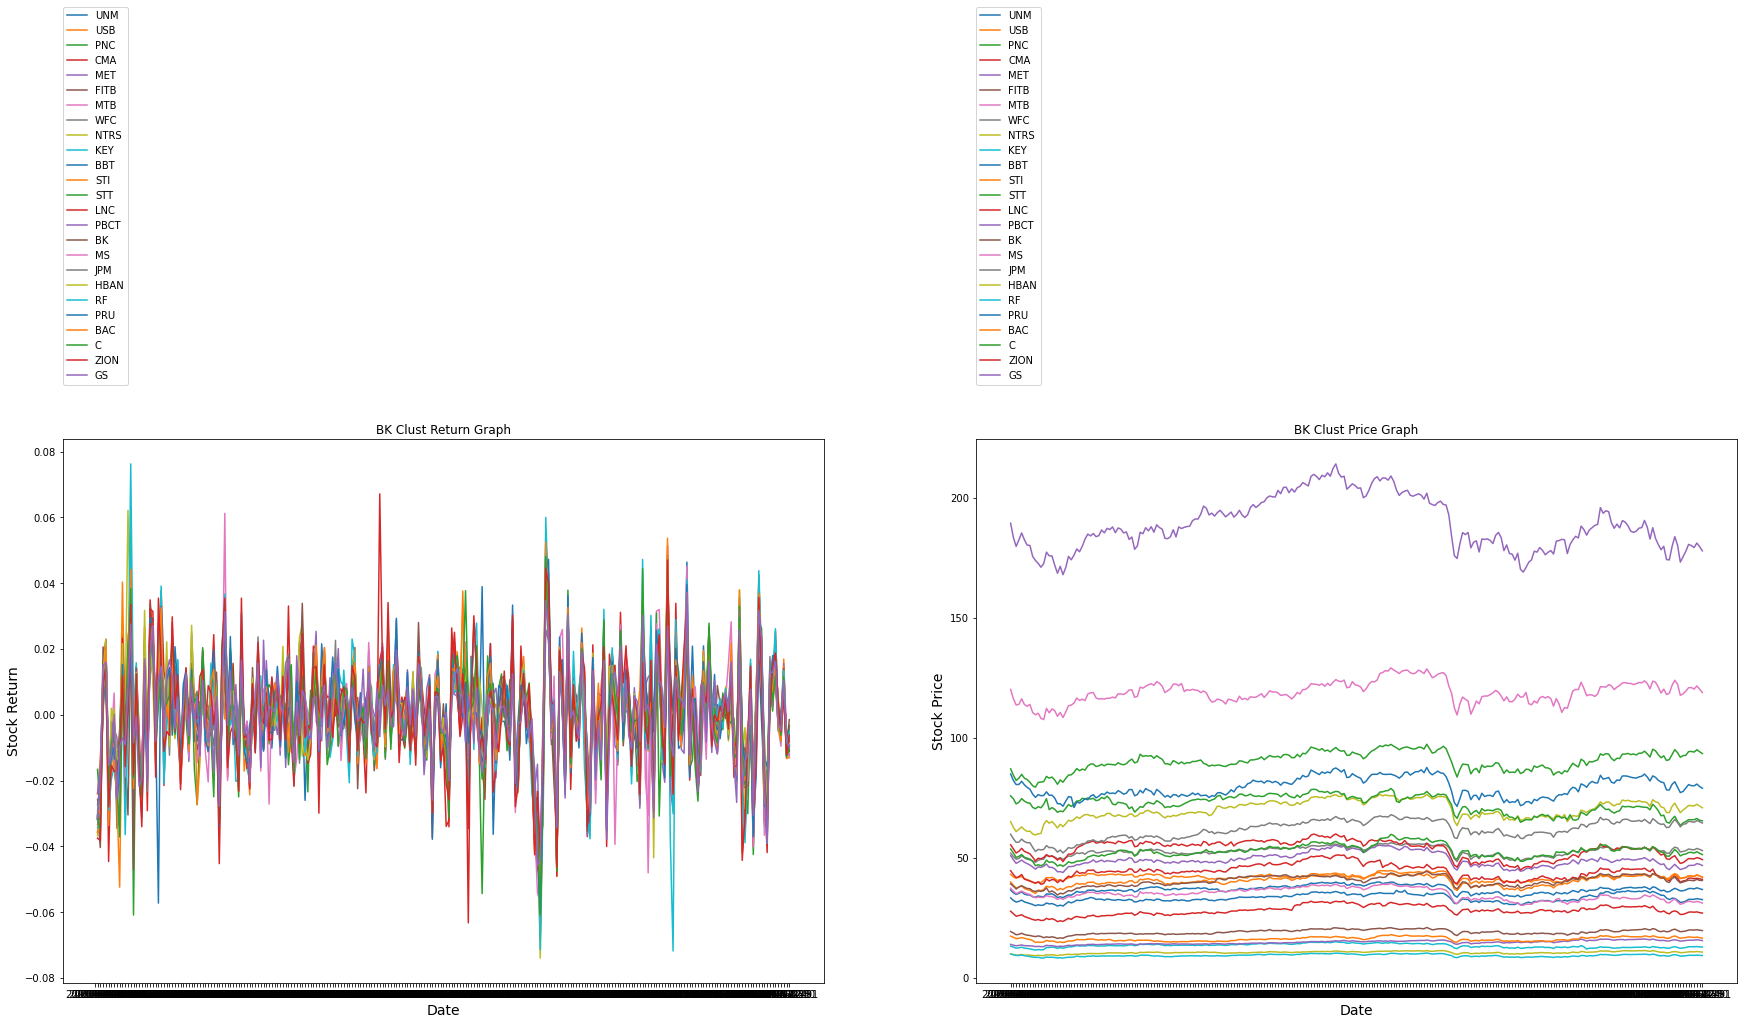

In [19]:
legend = [each for each in all_clusters['BK']]
plt.figure(figsize=(30,10))

a = plt.subplot(121)
for each in legend:
    a.plot(returns.index, returns[each])
a.legend(legend, loc=(0,1.1))
a.set_title('BK Clust Return Graph')
a.set_xlabel('Date', fontsize = 14)
a.set_ylabel("Stock Return", fontsize = 14)


a = plt.subplot(122)
for each in legend:
    a.plot(price_data.index, price_data[each])
a.legend(legend, loc=(0,1.1))
a.set_title('BK Clust Price Graph')
a.set_xlabel('Date', fontsize = 14)
a.set_ylabel("Stock Price", fontsize = 14)

Text(0, 0.5, 'Stock Price')

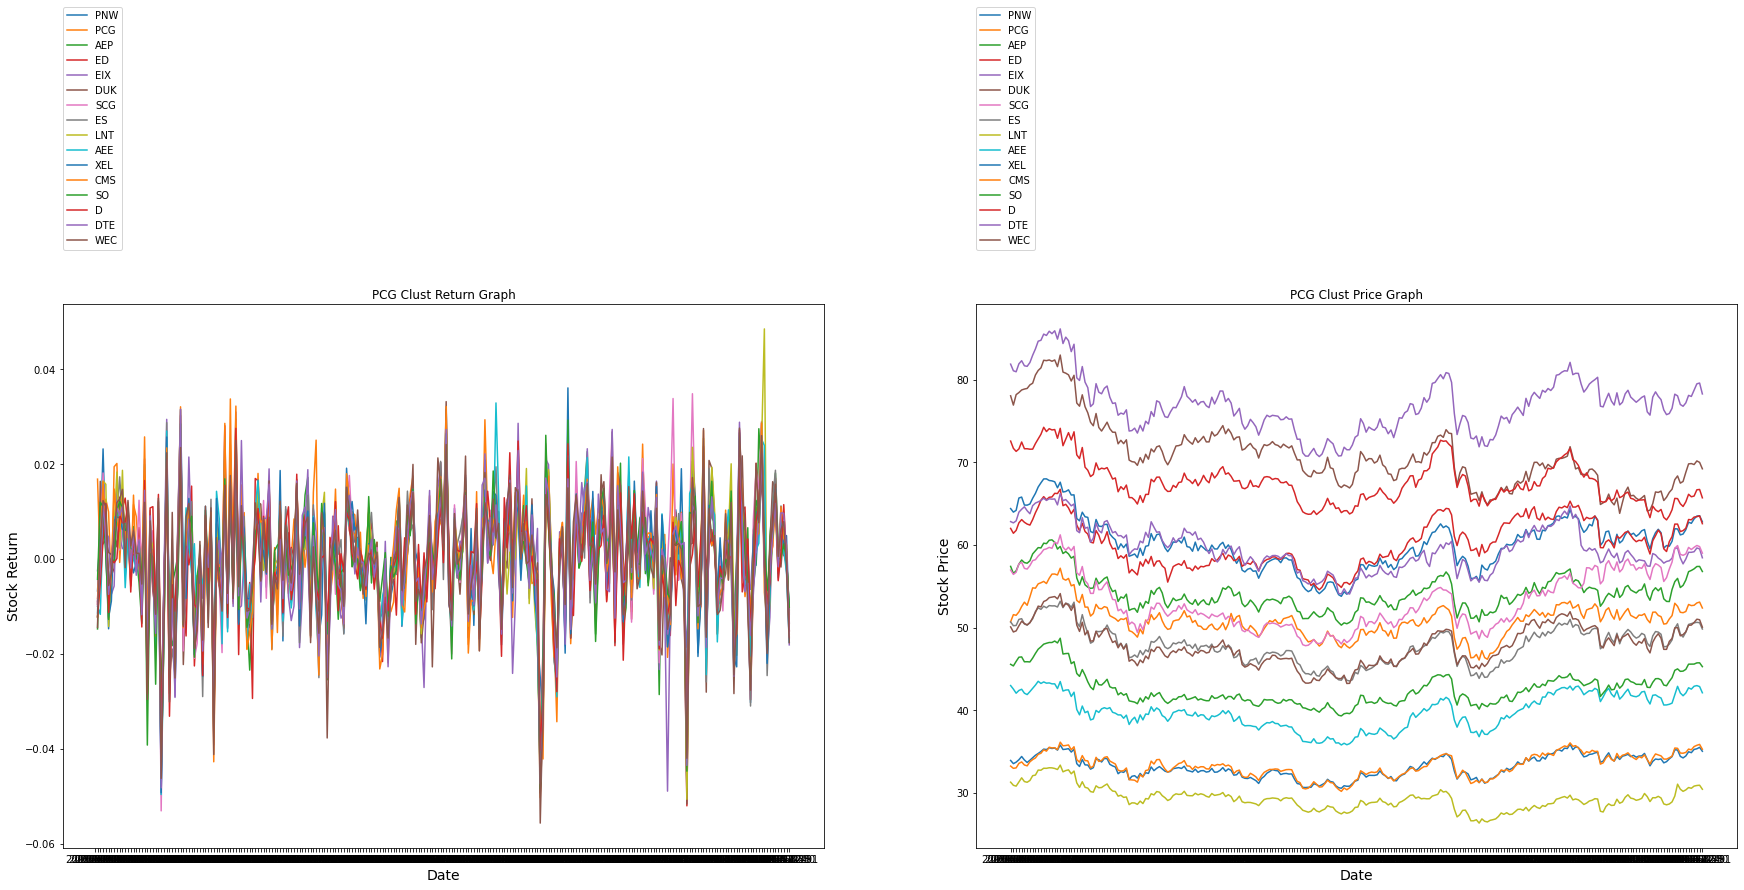

In [20]:
legend = [each for each in all_clusters['PCG']]
plt.figure(figsize=(30,10))

a = plt.subplot(121)
for each in legend:
    a.plot(returns.index, returns[each])
a.legend(legend, loc=(0,1.1))
a.set_title('PCG Clust Return Graph')
a.set_xlabel('Date', fontsize = 14)
a.set_ylabel("Stock Return", fontsize = 14)


a = plt.subplot(122)
for each in legend:
    a.plot(price_data.index, price_data[each])
a.legend(legend, loc=(0,1.1))
a.set_title('PCG Clust Price Graph')
a.set_xlabel('Date', fontsize = 14)
a.set_ylabel("Stock Price", fontsize = 14)

Text(0, 0.5, 'Stock Price')

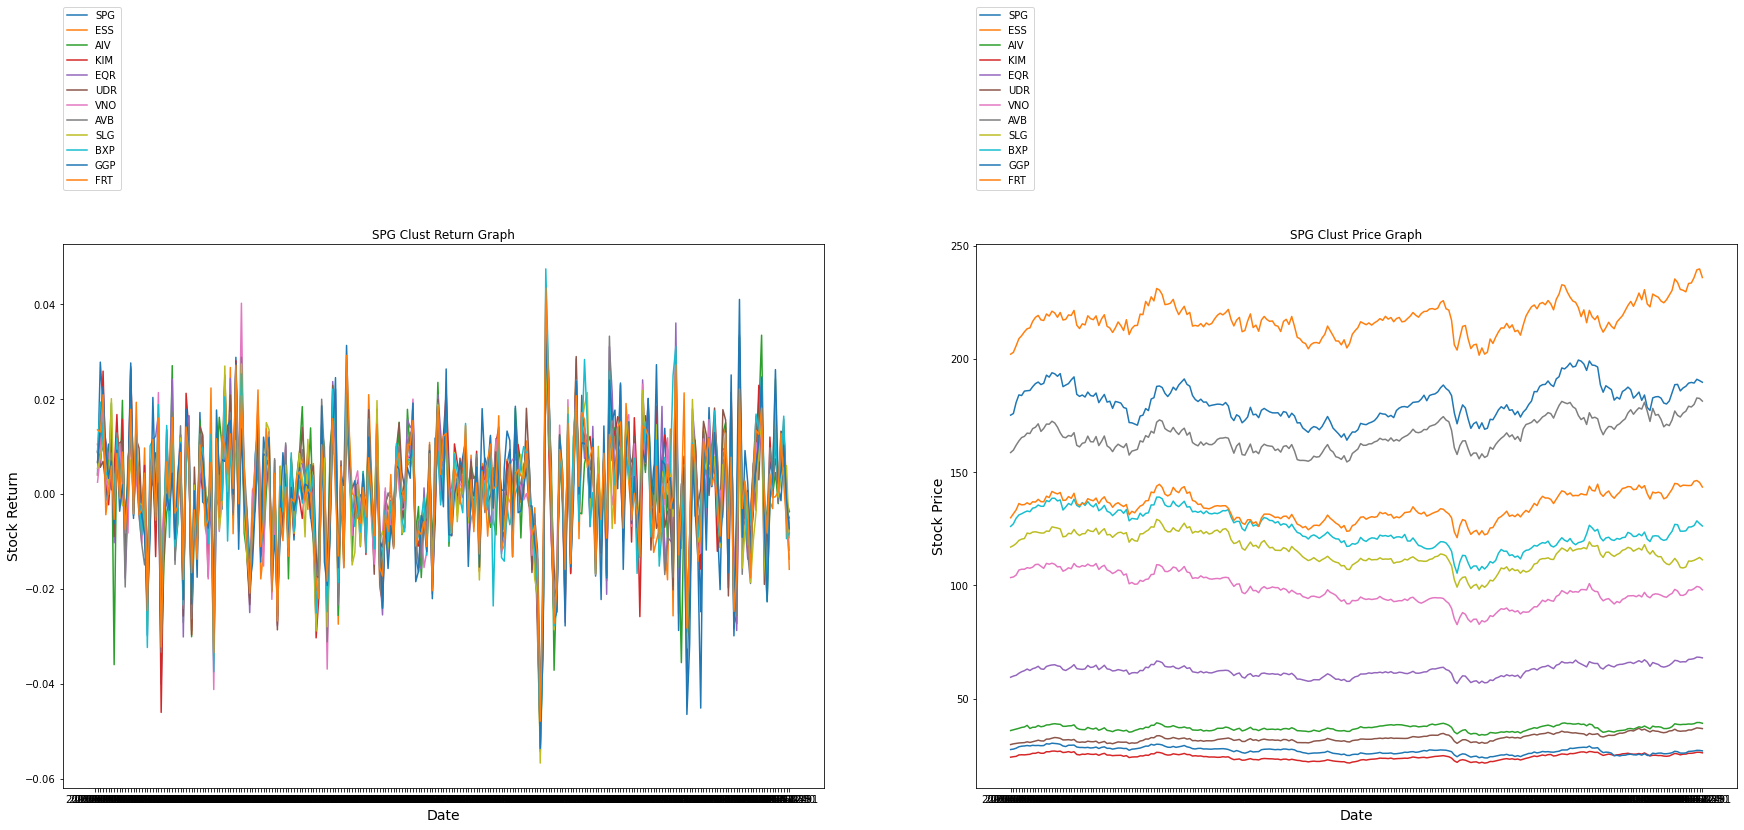

In [21]:
legend = [each for each in all_clusters['SPG']]
plt.figure(figsize=(30,10))

a = plt.subplot(121)
for each in legend:
    a.plot(returns.index, returns[each])
a.legend(legend, loc=(0,1.1))
a.set_title('SPG Clust Return Graph')
a.set_xlabel('Date', fontsize = 14)
a.set_ylabel("Stock Return", fontsize = 14)


a = plt.subplot(122)
for each in legend:
    a.plot(price_data.index, price_data[each])
a.legend(legend, loc=(0,1.1))
a.set_title('SPG Clust Price Graph')
a.set_xlabel('Date', fontsize = 14)
a.set_ylabel("Stock Price", fontsize = 14)

## Part 3: 

**40% of grade**

Depending on your interests, you may work on either subsection below, or both. You might go deeper into one question than another, but for an outstanding grade, you should have at least some discussion on both.

### In-depth analysis

The project is _open_ in the sense that you can probably think of further interesting questions to look into based on returns, correlations, and clusters. This is not required but being creative and going further than the above questions will make your work stand out. You can explore one or several of the ideas below, or come up with questions of your own.

Depending on your interests, you might look at different things. For example, when researching the algorithm, you might be interested in its complexity, and how to improve your implementation's efficiency. On Wikipedia, you may find a couple of ways to drastically improve the algorithm speed, but are relatively small changes to your code.

If you're more interested in the financial applications of clustering, there are also opportunities to think about further steps. For example, some people claim that you can derive trading strategies based on clustering - that often one of the stocks in a cluster is a leader and the others follow that price. If this is true, you could track the price of the leader stock and then trade the other stocks in the cluster based on changes in the leader's price. Do you think this would make sense? Do you have an idea on how to identify a leader stock?

You might also want to repeat the analysis for different time periods. You would be able to do this by looking at the code for the second homework to figure out how to read data from Yahoo Finance using pandas, and going through the process for all companies in the csv file for another time period. Perhaps you could explore for example how correlations between companies have changed over time, or how clusters found by your algorithm change over time.

### Exploring other clustering methods 

You've used just one approach to clustering, and arguably not the best one. Research clustering algorithms and libraries to apply them in Python. Discuss some other algorithms that could be used, and how they differ from the one you've implemented. Look at the Python library `scikit-learn`. How would you apply the clustering algorithms provided by the library to stock price data? Would you need to develop new metrics other than correlations? If you want to go even further,  try running some of these other clustering algorithms on your data, and report the results. Start from here: http://scikit-learn.org/stable/modules/clustering.html#clustering; you'll find a stock market example there too. For future reference, you may also find other interesting machine-learning tools for both stock market analysis or other analytics purposes.

### Question 4

Create cells below to add your extra part as code and narrative text explaining your idea and results.

### Section for In-Depth Analysis (Yanghao)

This section will be focused on the financial applications of clustering and analysis for different time periods. First, pandas_datareader needs to be installed on the computer using the command "conda install pandas-datareader" by opening the command line. ( Your anaconda needs to be the lastest version, or there might be some errors. ) The function get_stock is defined to load the data from Yahoo finance.

In [22]:

import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
from datetime import datetime


def get_stock(symbol, start, end):
    """
    Downloads stock price data from Yahoo
    Returns a pandas dataframe.
    """
    df = pdr.DataReader(symbol, 'yahoo', start, end)
    df = df.sort_index(axis=0)
    return df

Then, we define the start and finish date of the stocks and load the price within these dates. To make things intuitive, we take AAPL and FCX as an example. Finally, the first three lines of daily returns are displayed in the form of dataframe.

In [23]:
start = datetime(2015, 1, 1)
finish = datetime(2015, 12, 31)
aapl=get_stock('AAPL',start,finish)
aapl=aapl['Close']

fcx=get_stock('FCX',start,finish)
fcx=fcx['Close']

aapl=pd.DataFrame(aapl)
aapl.columns=['AAPL']
fcx=pd.DataFrame(fcx)
fcx.columns=['FCX']
result1 = pd.merge(aapl,fcx, on = 'Date')

returns1 = result1.pct_change()

display(returns1[:3])

,AAPL,FCX
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.028172,-0.059448
2015-01-06,0.000094,0.017156


To discover the relationships bewteen leader stock and others, We fix the parameter k in part two to be 500 and take a look at the particular cluster 'PAYX': {'ADP', 'FISV', 'PAYX'}, where PAYX is the bottom node of this cluster.

In [24]:
start = datetime(2015, 1, 1)
finish = datetime(2015, 12, 31)
aapl=get_stock('AAPL',start,finish)
aapl=aapl['Close']
aapl=pd.DataFrame(aapl)
aapl.columns=['AAPL']
frame2=aapl
firms=['ADP', 'FISV', 'PAYX']
for item in firms:
    frame1=get_stock(item,start,finish)
    frame1=frame1['Close']
    frame1=pd.DataFrame(frame1)
    frame1.columns=[item]
    frame2=pd.merge(frame1,frame2,on='Date')
display(frame2)



,PAYX,FISV,ADP,AAPL
Date,,,,
2015-01-02,46.240002,35.310001,83.290001,27.332500
2015-01-05,46.320000,34.910000,83.230003,26.562500
2015-01-06,45.990002,34.945000,82.540001,26.565001
2015-01-07,46.830002,35.419998,83.260002,26.937500
2015-01-08,47.560001,36.139999,85.169998,27.972500
...,...,...,...,...
2015-12-24,53.820000,46.529999,85.940002,27.007500
2015-12-28,53.790001,46.570000,85.750000,26.705000
2015-12-29,54.259998,47.090000,86.839996,27.184999


In [25]:
returns1 = frame2.pct_change()

display(returns1[:3])

corr_matrix = []
for col1 in returns1:
    corrs = []
    for col2 in returns1:
        if col1 == col2:
            corrs.append(1)
        else:
            corrs.append(returns1[col1].corr(returns1[col2]))
    corr_matrix.append(pd.DataFrame({col1: corrs}).reset_index(drop=True))

cm1 = pd.concat(corr_matrix,axis=1)
cm1.index = list(cm1.head(0))
display(cm1)

,PAYX,FISV,ADP,AAPL
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,0.001730,-0.011328,-0.00072,-0.028172
2015-01-06,-0.007124,0.001003,-0.00829,0.000094


,PAYX,FISV,ADP,AAPL
PAYX,1.000000,0.786165,0.832450,0.468203
FISV,0.786165,1.000000,0.834917,0.574009
ADP,0.832450,0.834917,1.000000,0.506478
AAPL,0.468203,0.574009,0.506478,1.000000


By comparing the price data and the correlation relationships, they all show the similar trend where PAVX is the leading stock.
Thus, tracking the price of the leader stock and then trading the other stocks in the cluster based on changes in the leader's price does make sense. The reason lies in that the cluster algorithm will take high correlation nodes and form them into clusters, the bottom node has high correlations with the connected nodes. Therefore, the changes in the leading stock (bottom node) could have influence on other stocks in the same cluster.

Next, we repeat the analysis for different time periods to discover how the correlation gonna change for differnt stocks from same and different clusters.

In [26]:
start = datetime(2015, 1, 1)
finish = datetime(2015, 12, 31)
firms=['FCX','RIG','SWN','WYNN', 'KEY', 'JPM', 'ZION', 'RF', 'AMP', 'STT', 'USB','ADP', 'FISV', 'PAYX']
def different_time_period(start,finish):
    aapl=get_stock('AAPL',start,finish)
    aapl=aapl['Close']
    aapl=pd.DataFrame(aapl)
    aapl.columns=['AAPL']
    frame2=aapl
    for item in firms:
        frame1=get_stock(item,start,finish)
        frame1=frame1['Close']
        frame1=pd.DataFrame(frame1)
        frame1.columns=[item]
        frame2=pd.merge(frame1,frame2,on='Date')
    returns = frame2.pct_change()
    corr_matrix = []
    for col1 in returns:
        corrs = []
        for col2 in returns:
            if col1 == col2:
                corrs.append(1)
            else:
                corrs.append(returns[col1].corr(returns[col2]))
        corr_matrix.append(pd.DataFrame({col1: corrs}).reset_index(drop=True))

    cm1 = pd.concat(corr_matrix,axis=1)
    cm1.index = list(cm1.head(0))
    return cm1


In [27]:
start = datetime(2015, 1, 1)
finish = datetime(2015, 12, 31)
different_time_period(start,finish)

,PAYX,FISV,ADP,USB,STT,AMP,RF,ZION,JPM,KEY,WYNN,SWN,RIG,FCX,AAPL
PAYX,1.000000,0.786165,0.832450,0.678956,0.621912,0.688008,0.561255,0.525131,0.664803,0.598860,0.201612,0.170135,0.076575,0.310218,0.468203
FISV,0.786165,1.000000,0.834917,0.705627,0.611875,0.701723,0.571710,0.535902,0.676282,0.597954,0.247427,0.172747,0.112994,0.318360,0.574009
ADP,0.832450,0.834917,1.000000,0.707039,0.593922,0.682561,0.544612,0.515089,0.665361,0.593384,0.208606,0.161616,0.096271,0.301310,0.506478
USB,0.678956,0.705627,0.707039,1.000000,0.756877,0.800175,0.835636,0.803097,0.872007,0.851942,0.293196,0.236554,0.223826,0.391855,0.539914
STT,0.621912,0.611875,0.593922,0.756877,1.000000,0.765369,0.749575,0.703499,0.800182,0.741864,0.282919,0.351804,0.292921,0.420929,0.445334
AMP,0.688008,0.701723,0.682561,0.800175,0.765369,1.000000,0.746146,0.722989,0.839386,0.768173,0.271966,0.318166,0.283862,0.445550,0.530174
RF,0.561255,0.571710,0.544612,0.835636,0.749575,0.746146,1.000000,0.885559,0.842136,0.892089,0.261114,0.272224,0.277665,0.378991,0.412726
ZION,0.525131,0.535902,0.515089,0.803097,0.703499,0.722989,0.885559,1.000000,0.801727,0.819521,0.285244,0.317928,0.327055,0.478130,0.390632
JPM,0.664803,0.676282,0.665361,0.872007,0.800182,0.839386,0.842136,0.801727,1.000000,0.850660,0.280973,0.309611,0.277895,0.408711,0.521287
KEY,0.598860,0.597954,0.593384,0.851942,0.741864,0.768173,0.892089,0.819521,0.850660,1.000000,0.253850,0.251936,0.209728,0.347820,0.438050


In [28]:
start = datetime(2020, 1, 1)
finish = datetime(2020, 12, 31)
different_time_period(start,finish)

,PAYX,FISV,ADP,USB,STT,AMP,RF,ZION,JPM,KEY,WYNN,SWN,RIG,FCX,AAPL
PAYX,1.000000,0.751596,0.827226,0.699113,0.653224,0.811111,0.611047,0.576456,0.719507,0.610512,0.489698,0.026299,0.407360,0.641226,0.666190
FISV,0.751596,1.000000,0.796253,0.678165,0.689835,0.786252,0.690452,0.533417,0.732034,0.695886,0.616686,0.064392,0.361440,0.685199,0.638933
ADP,0.827226,0.796253,1.000000,0.704616,0.694437,0.793420,0.682096,0.549937,0.741000,0.697826,0.529011,0.098714,0.418267,0.652399,0.636220
USB,0.699113,0.678165,0.704616,1.000000,0.829974,0.862253,0.879593,0.873843,0.919096,0.893913,0.630071,0.226806,0.480430,0.612114,0.486062
STT,0.653224,0.689835,0.694437,0.829974,1.000000,0.839500,0.791293,0.758408,0.872577,0.820501,0.671366,0.233280,0.471198,0.688798,0.548437
AMP,0.811111,0.786252,0.793420,0.862253,0.839500,1.000000,0.807273,0.718045,0.890702,0.814707,0.625736,0.185416,0.493080,0.733530,0.647255
RF,0.611047,0.690452,0.682096,0.879593,0.791293,0.807273,1.000000,0.855508,0.886015,0.952508,0.709898,0.206459,0.496188,0.697812,0.456205
ZION,0.576456,0.533417,0.549937,0.873843,0.758408,0.718045,0.855508,1.000000,0.830684,0.845148,0.651037,0.295174,0.466211,0.547300,0.323275
JPM,0.719507,0.732034,0.741000,0.919096,0.872577,0.890702,0.886015,0.830684,1.000000,0.906120,0.702278,0.197658,0.512586,0.692838,0.533996
KEY,0.610512,0.695886,0.697826,0.893913,0.820501,0.814707,0.952508,0.845148,0.906120,1.000000,0.712774,0.235742,0.514110,0.688477,0.445679


In [29]:
start = datetime(2018, 1, 1)
finish = datetime(2018, 12, 31)
different_time_period(start,finish)

,PAYX,FISV,ADP,USB,STT,AMP,RF,ZION,JPM,KEY,WYNN,SWN,RIG,FCX,AAPL
PAYX,1.000000,0.654030,0.795949,0.544296,0.445310,0.557677,0.495379,0.474181,0.548355,0.501622,0.266317,0.260063,0.297534,0.307138,0.477306
FISV,0.654030,1.000000,0.676778,0.455962,0.394999,0.482747,0.346951,0.339259,0.454424,0.394660,0.190006,0.321401,0.367559,0.302763,0.476557
ADP,0.795949,0.676778,1.000000,0.533430,0.489515,0.564782,0.515385,0.487486,0.571207,0.503547,0.316985,0.243186,0.343292,0.368267,0.580257
USB,0.544296,0.455962,0.533430,1.000000,0.629453,0.706674,0.745009,0.743426,0.777977,0.794531,0.273441,0.277136,0.294415,0.346835,0.364832
STT,0.445310,0.394999,0.489515,0.629453,1.000000,0.705143,0.657621,0.655121,0.715529,0.695733,0.342584,0.296521,0.388728,0.466438,0.406598
AMP,0.557677,0.482747,0.564782,0.706674,0.705143,1.000000,0.689340,0.670101,0.737038,0.700850,0.343097,0.337419,0.410020,0.484475,0.487696
RF,0.495379,0.346951,0.515385,0.745009,0.657621,0.689340,1.000000,0.877273,0.804621,0.884799,0.297838,0.273208,0.307768,0.401510,0.392079
ZION,0.474181,0.339259,0.487486,0.743426,0.655121,0.670101,0.877273,1.000000,0.764131,0.859741,0.222634,0.260324,0.298167,0.332895,0.398206
JPM,0.548355,0.454424,0.571207,0.777977,0.715529,0.737038,0.804621,0.764131,1.000000,0.785343,0.324222,0.284361,0.375548,0.449750,0.517740
KEY,0.501622,0.394660,0.503547,0.794531,0.695733,0.700850,0.884799,0.859741,0.785343,1.000000,0.257228,0.335456,0.348082,0.375212,0.392476


Comparing the data from 2015, 2018 and 2020, we can find that the correlation bewteen stocks from the same cluster remains for a high level during all the three years while the correlation bewteen stocks from different clusters varies a lot.

### Section for other Clustering Methods 

We looked at two other clustering methods:
1. KMeans
2. Affinity Propagation



**Kmeans**

Kmeans is an archetypal clustering algorithm. 

In KMeans, the number of clusters K is a hyperparameter that requires human input, and the core task of KMeans is to find the K optimal cardinalities based on the set K and assign the nearest data to each of the clusters represented by these cardinalities. The process can be summarised as follows: \
1. Randomly select K samples as the initial centroids;
2. Start the loop; \
   2.1. Assign each sample point to their nearest centroids, generating K clusters; \
   2.2. For each cluster, the average of all sample points assigned to that cluster is calculated as the new centroids;
3. When the position of the centroids no longer changes, the iteration stops and the clustering is complete.

The reason why we choose k-means for cluster analysis is that it is ususally faster than other clustering algorithms in practice when it finds the local minimum of Inertia. This is why it is useful to restart it several times.

The average complexity of the KMeans algorithm is $O(k*n*T)$, where k is our hyperparameter, the number of clusters required as input, n is the sample size in the entire dataset, and T is the number of iterations required (the average complexity of KNN is $O(n)$).

In the worst case, the complexity of KMeans can be written as $O(n^{(k+2)/p})$, where n is the number of samples in the entire dataset and p is the total number of features. This maximum complexity was proposed by D. Arthur and S. Vassilvitskii in their 2006 paper "How slow is the k-means method? ".



In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import covariance, cluster

In [ ]:
X = returns
X

In [ ]:
SSE = [] #Sum of squared errors
# Take the values of k from 1 to 30 and do kmeans clustering to see the sum of squared intra-cluster errors corresponding to different k values
for i in range(1,31):
    km = KMeans(n_clusters=i) # init: initial value selection method, optional values: 'k-means++' (use mean), 'random' ( random), an ndarray (specify an array), default is 'k-means++'
    km.fit(X)
    SSE.append(km.inertia_)  # Sum of squared errors within a cluster, append() adds a column at the end
plt.plot(range(1, 31), SSE, marker='o')  # marker adds the corresponding point on the discounted value
plt.xlabel('Number of clustering groups')
plt.ylabel('SSE')
plt.show()

In [ ]:
# From the above graph, we see that the inflection point appeared roughly at 27, so we took 27 clustering groups.
kmodel = KMeans(n_clusters = 27)
kmodel.fit(X)

In [ ]:
label = pd.Series(kmodel.labels_) # Series includes the number of categories
print(label)

In [ ]:
num = pd.Series(kmodel.labels_).value_counts() # Count the number within each category
print(num)

In [ ]:
center = pd.DataFrame(kmodel.cluster_centers_) # Find the clustering centre
print(center)

In [ ]:
r = pd.concat([center, num], axis = 1) 
# Horizontal clustering (0 is vertical).
# To get the number of categories under the category corresponding to the cluster centre.
print(r)

In [ ]:
r.columns = list(X.columns) + [u'total in this category'] #Rename table headers
print(r)

In [ ]:
# The following method is inspired by https://medium.datadriveninvestor.com/stock-market-clustering-with-k-means-clustering-in-python-4bf6bd5bd685.

# The original data has too many features to plot a 2D scatter for kmeans analysis
# Here we use PCA to reduce it to a 2 dimensional data with 2 features and then k-means clustering is applied.
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
# Define a normalizer
normalizer = Normalizer()
# dataframe transposition
X = X.T

In [ ]:
from sklearn.decomposition import PCA
# First we normalize the data to fit the model better
# And fit the model at the same line
norm_returns = normalizer.fit_transform(X)
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
# As stated before, we have 27 clustering groups
kmodel_2d = KMeans(n_clusters = 27)
# Make a pipeline chaining normalizer, pca and kmodel_2d
pipeline = make_pipeline(normalizer,reduced_data,kmodel_2d)
# Fit pipeline to daily stock returns
pipeline.fit(X)
# Prediction
labels = pipeline.predict(X)
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_returns)

In [ ]:
companies = list(names_dict.keys())
companies.remove('CSRA')
companies.remove('FTV')
companies.remove('HPE')
companies.remove('KHC')
companies.remove('NEE')
companies.remove('PYPL')
companies.remove('WRK')
companies.remove('WLTW')

In [ ]:
# Draw a table of the corresponding labels for each company
df_2d = pd.DataFrame({'labels':labels,'companies':companies}).sort_values(by=['labels'],axis = 0)
df_2d

In [ ]:
# As we can see, the stock in the same sector usually have the same label.

In [ ]:
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmodel_2d.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmodel_2d.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market returns (based on PCA-reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()

*   The graph above show how these stocks distributed in different clustering groups.
*   The margin of the groups is clear, so the clustering analysis is effective.



**Affinity Propagation**

The reason why we choose Affinity Propagation for is because its special property compared to other methods:
It doens't require the number of cluster to be specified before even looking at the data. 

How does it work:

`Affinity Propagation` is an unsupervised learning clustering method. It measures the similarity between pairs of data points,the similarity value sent between data pairs, and updated in response to the values from other pairs. This updating happens iteratively until convergence, at which point the final exemplars are chosen, and hence the final clustering is given. ([Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.](https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation) )


We can still use correlations (or covariance, same thing) as a measuring metrix for `AffinityPropagation`. However, the indication of the result changes: our clustering algorithm reflects relations between companies, but `AffinityPropagation` reflects marginal properties: variables clustered together can be considered as having a similar impact at the level of the full stock market.


**Advantage** of using `AffinityPropagation` to cluster stock data: The algorithm chooses automatically the number of clusters depending on the data, and the resulting clusters do not need to be of the same size. This makes more sense as it does not require the number of clusters to be specified before running the algorithm.

**Drawback** of using `AffinityPropagation` to cluster stock data:  Complexity. The algorithm has a time complexity of the order $O(N^2T)$ where $N$ is the number of samples and $T$ is the number of iteration before convergence. These two parameters restrict the size of the data, meaning this algorithm is most appropriate for small or medium sized datasets. Therefore, if we want to perform clustering on a huge time series stock price data, Affinity Propagation method might **not** be the best choice.  For example, in the [Visualizing the stock market structure example](https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html#sphx-glr-auto-examples-applications-plot-stock-market-py) , the dataset only has 5-year stock prices for less than 60 companies, which is far less than our data. 

In [30]:
## Code to perform Affinity Propagation on a reduced-size dataset of stock price.
#import essential packages
import numpy as np
import pandas as pd
from sklearn import cluster,covariance


/Users/ziningyuan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [31]:
# In previous section, we have calculated the correlations, so here we just simply use it.
# the na in correlation is the correlation of the stock itself, so just filled with 1. 
corre_nonna = cm.fillna(1)
corre_array =corre_nonna.to_numpy()

In [32]:
# Perform Affinity Propagation clustering on the data and print out the clusters
centres, labels = cluster.affinity_propagation(corre_array, random_state=0)
n_labels = labels.max()
names = list(cm)
names = np.array(names)

for i in range(n_labels + 1):
    print(f"Cluster {i + 1}: {', '.join(names[labels == i])}")


Cluster 1: AET, ANTM, CNC, CI, HUM, UNH
Cluster 2: GOOGL, GOOG, AMZN
Cluster 3: ALXN, AGN, AMGN, BIIB, BMY, CELG, ENDP, GILD, ILMN, MNK, PRGO, PFE, REGN, VRTX
Cluster 4: CCL, EXPE, RCL
Cluster 5: CMG
Cluster 6: AA, APC, APA, BHI, CHK, CVX, XEC, CXO, COP, DVN, DO, EOG, XOM, FTI, FCX, HAL, HP, HES, LYB, MRO, MUR, NOV, NFX, NBL, OXY, PXD, SLB, RIG
Cluster 7: CSX, KSU, NSC, UNP
Cluster 8: DHI, LEN, PHM
Cluster 9: ALK, AAL, DAL, LUV, UAL
Cluster 10: DISCA, DISCK, SNI
Cluster 11: LNT, AEE, AEP, AWK, CNP, CMS, ED, D, DTE, DUK, EIX, ETR, ES, EXC, FE, NI, PCG, PNW, PPL, PEG, SCG, SRE, SO, WEC, XEL
Cluster 12: AME, CAT, CMI, EMN, ETN, EMR, FSLR, FLIR, FLS, FLR, FMC, GPC, JEC, MON, PCAR, PH, PWR, R, SPLS, URI
Cluster 13: ATVI, AYI, ADBE, ALLE, ADS, ADP, AZO, HRB, CA, CERN, CTAS, CTXS, CTSH, DNB, EA, EFX, FB, FIS, FISV, GD, GPN, INTU, LLL, LMT, NOC, ORLY, PAYX, RHT, RHI, SIG, SBUX, TSS, TDG, VAR, VRSN, V
Cluster 14: AMG, BLK, BWA, CBS, CTL, EBAY, BEN, FTR, GRMN, GT, HOG, IVZ, LM, LUK, MJN, NTAP, P

We can see the algorithm returns 44 clusters, and 8 of them only contain one stock.

Taking Cluster 43 as an example for analysis, it contains MPC(Oil & Gas Refining & Marketing), PSX (Oil & Gas Refining & Marketing), TSO (Biotechnology), VLO (Oil & Gas Refining & Marketing). We can see 3 out of 4 companies belong to the same industry.  However, we cannot reach a conclusion that the algorithm is the best fit for our project, because we need further examination on all the clusters so that we can open the black box of this unsupervised machine learning technique. 

## All done!

Create a zip file containing your submission and upload it on the Hub.